In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [13]:
file_name = 'USUnemployment.csv'
df = pd.read_csv('./data/' + file_name)

df['Average'] = df.apply(lambda x: (x.Jan+x.Feb+x.Mar+x.Apr+x.May+x.Jun+x.Jul+x.Aug+x.Sep+x.Oct+x.Nov+x.Dec)/12, axis=1)

In [14]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0,3.750000
1,1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6,6.050000
2,1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3,5.208333
3,1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1,3.283333
4,1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7,3.025000


In [26]:
def creat_cluster_model_and_plot(df, model_name):
    X = df[['Average']]

    n_clusters = 3
    if model_name == 'km':
        model = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    elif model_name == 'gm':
        model = GaussianMixture(n_components=n_clusters, random_state=0).fit(X)
        
    df['Cluster'] = model.predict(X)
    
    for cluster in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data['Year'], cluster_data['Average'], label=f'Cluster {cluster}')
    
    plt.xlabel('Year')
    plt.ylabel('Yearly Average')
    plt.title(model_name)
    plt.legend()
    plt.show()            

/home/tina/tf-demo/tensorflow-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


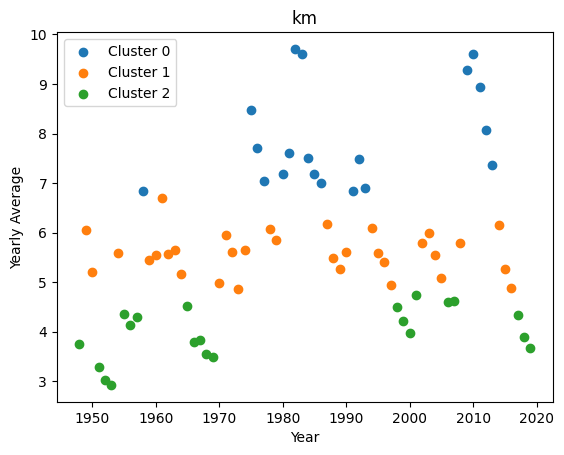

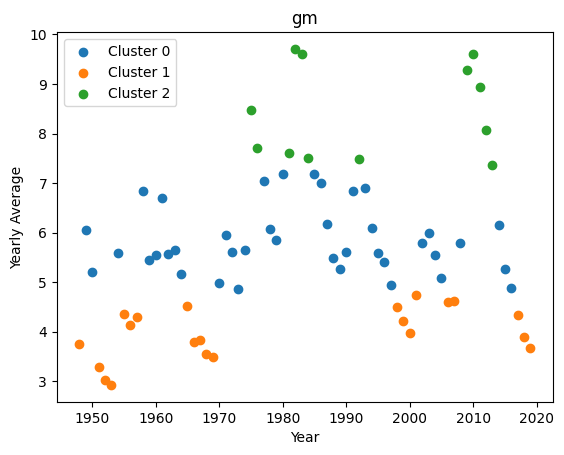

In [27]:
creat_cluster_model_and_plot(df, 'km')
creat_cluster_model_and_plot(df, 'gm')